In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import pandas as pd 
import numpy as np
from math import trunc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Creating a copy of the original dataframe
df_model = df.copy()

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_model.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Converting floor column to int
df_model['floors'] = df_model['floors'].astype(int)

In [ ]:
df_model.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
# Removing the decimal parts
df_model.bathrooms = round(df_model.bathrooms)

In [ ]:
# Converting bathrooms column to int
df_model.bathrooms = df_model.bathrooms.astype(int)

In [ ]:
df_model.bathrooms.value_counts()

2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64

In [ ]:
# Fixing the negative values in the long column
df_model['long'] = df_model['long'] * -1

In [ ]:
df_model.query("long <= 0")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
df_model.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Dropping unnecessary features
df_model.drop(['id', 'date', 'zipcode', 'yr_renovated'], axis = 1, inplace = True)

In [ ]:
df_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,47.5112,122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,47.7210,122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,47.7379,122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,47.5208,122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,47.6168,122.045,1800,7503


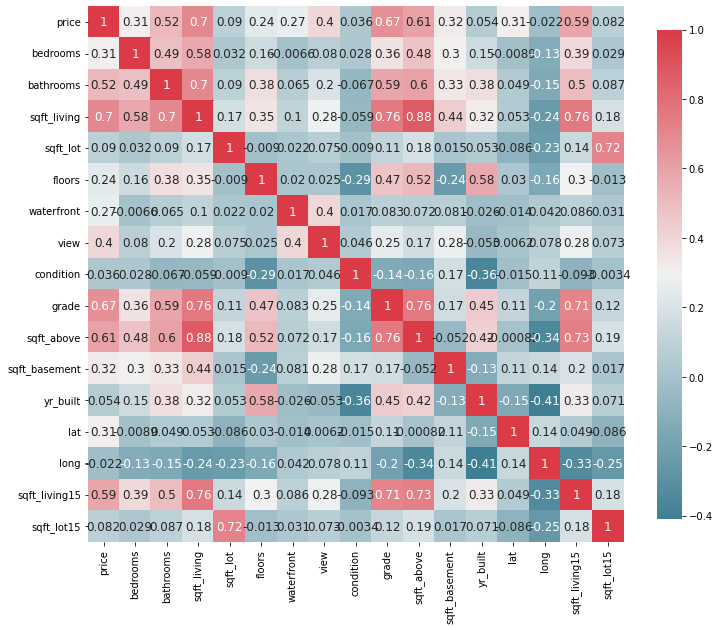

In [ ]:
# Plotting the correlation map
def plot_correlation_map(df):
    corr = df.corr()
    s,ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, cmap = cmap,
        square=True, cbar_kws={ 'shrink' : .9 }, 
ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }
)
plot_correlation_map(df_model)

In [ ]:
# Converting grade column to categorical type
df_model.grade = df_model.grade.astype('category')

[Text(0.5, 1.0, 'Grade vs Price')]

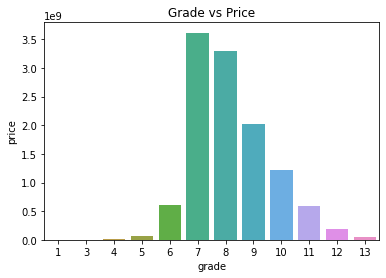

In [ ]:
df_grade = df_model.groupby('grade', as_index = False)['price'].sum()
ax = sns.barplot(data = df_grade, x = 'grade', y= 'price')
ax.set(title = 'Grade vs Price')

In [ ]:
df_grade.sort_values('price')

,grade,price
0,1,1.420000e+05
1,3,6.170000e+05
2,4,6.217050e+06
11,13,4.822500e+07
3,5,6.014280e+07
10,12,1.972100e+08
9,11,5.972398e+08
4,6,6.153122e+08
8,10,1.215388e+09
7,9,2.022737e+09


[Text(0.5, 1.0, 'Price vs square feet living')]

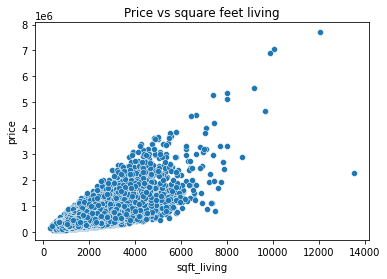

In [ ]:
ax = sns.scatterplot(x = 'sqft_living', y='price' , data=df_model)
ax.set(title = 'Price vs square feet living')

[Text(0.5, 1.0, 'Price vs square feet above')]

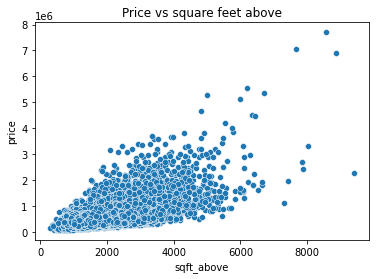

In [ ]:
ax = sns.scatterplot(x = 'sqft_above', y= 'price' , data=df_model)
ax.set(title = 'Price vs square feet above')

[Text(0.5, 1.0, 'price vs square feet living 15')]

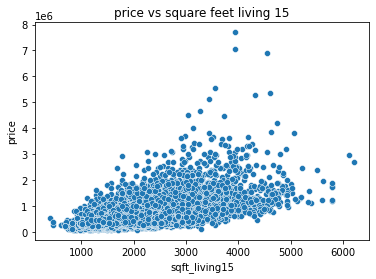

In [ ]:
ax = sns.scatterplot(x = 'sqft_living15', y= 'price' , data=df_model)
ax.set(title = 'price vs square feet living 15')

[Text(0.5, 1.0, 'price per view')]

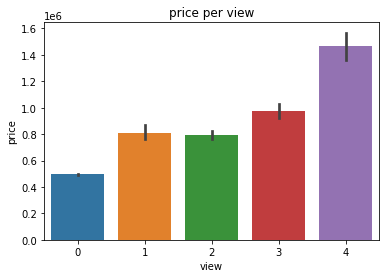

In [ ]:
ax = sns.barplot(x = 'view', y= 'price' , data=df_model)
ax.set(title='price per view')

After applying EDA, I selected the most important features based on the correlation between variables and my logical thinking.

Based on the correlation map and the above plots :
*   Price have a strong correlation with multiple variables
*   Some features show a weak correaltion with the price variable but selecting them helped me reach the maximum of model accuracy



***Linear Regression***

In [ ]:
x = df_model['sqft_living'].values[:, np.newaxis]
y = df_model['price'].values

In [ ]:
# Modeling
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state = 40)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

In [ ]:
# Testing the Linear model's performance
print('MSE', mean_squared_error(y_test, predicted))
print('R_squared', metrics.r2_score(y_test, predicted))

MSE 62902408306.86502
R_squared 0.4996528488387417


***Linear Regression Plot***

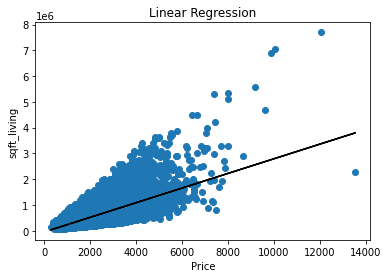

In [ ]:
plt.scatter(x,y)
plt.title('Linear Regression')
plt.ylabel("sqft_living")
plt.xlabel('Price')
plt.plot(x, model.predict(x), color='k')

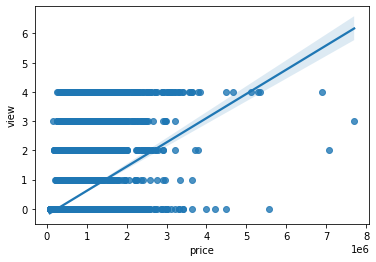

In [ ]:
sns.regplot(data = df_model, x= 'price', y = 'view')

***Multi-Linear Regression***

In [ ]:
x = df_model[['grade','sqft_living15', 'sqft_above','lat', 'long', 'sqft_basement', 'view','condition', 'yr_built', 'floors', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15']].values
y = df_model['price']

In [ ]:
# Modeling
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state = 40)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

In [ ]:
# Testing the Multi-Linear model's performance
print('MSE', mean_squared_error(y_test, predicted))
print('R_squared', metrics.r2_score(y_test, predicted))

MSE 37819055028.5975
R_squared 0.6991743726113513


The Multi-Linear Regression model had a better accuracy that the Linear model

***Polynomial Regression Degree 2***

In [ ]:
x = df_model[['grade','sqft_living', 'sqft_above','lat', 'long', 'sqft_basement', 'view', 'yr_built', 'floors', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_living15', 'sqft_lot15', 'condition']].values
y = df_model.price.values
poly = PolynomialFeatures(degree = 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state = 40)
model = LinearRegression()
x_pol = poly.fit_transform(x_train)
model.fit(x_pol, y_train)
x_test_pol = poly.fit_transform(x_test)
predicted = model.predict(x_test_pol)

In [ ]:
# Testing the polynomial model degree 2 performance
print('MSE', mean_squared_error(y_test, predicted))
print('R_squared', metrics.r2_score(y_test, predicted))

MSE 25421284457.331146
R_squared 0.7977904566859415


***Polynomial Regression Degree 3***

In [ ]:
x = df_model[['grade','sqft_living', 'sqft_above','lat', 'long', 'sqft_basement', 'view', 'yr_built', 'floors', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_living15', 'sqft_lot15', 'condition']].values
y = df_model['price']

In [ ]:
poly = PolynomialFeatures(degree = 3)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state = 40)
model = LinearRegression()
x_pol = poly.fit_transform(x_train)
model.fit(x_pol, y_train)
x_test_pol = poly.fit_transform(x_test)
predicted = model.predict(x_test_pol)

In [ ]:
# Testing the polynomial model degree 3 performance
print('MSE', mean_squared_error(y_test, predicted))
print('R_squared', metrics.r2_score(y_test, predicted))

MSE 98842714826.52647
R_squared 0.213771426123605


The polynomial regression with degree 2 is a way better than the Linear model, Multi-Linear model and the Polynomial model with degree 3 in terms of accuracy